
image 1/1 /home/santos.urones/TeamAware/NewDataset/DoorsWindows/images/valid/0e9191e310909562.jpg: 480x640 2 doorss, 1 windows, 1394.8ms
Speed: 3.8ms preprocess, 1394.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


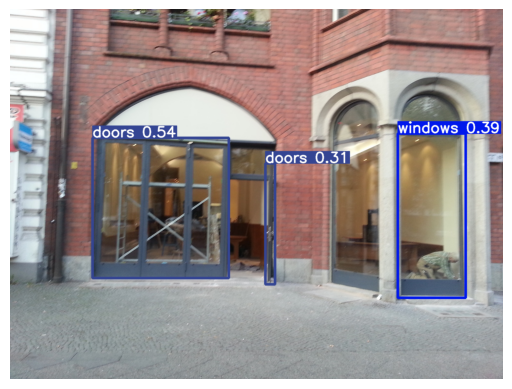

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt 

file_name = '0e9191e310909562.jpg'
# Inferencia con un modelo preentrenado de una imagen seleccionada
model=YOLO("runsMLFLOW/2c6f9c54dab44234ab8260762f67d1b3/artifacts/best.pt")
results = model.predict(source='NewDataset/DoorsWindows/images/valid/'+file_name, save_txt=False)
results[0].boxes
res_plotted = results[0].plot()
# Convertir la imagen a formato RGB
res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

# Mostrar la imagen utilizando pyplot
plt.imshow(res_rgb)
plt.axis('off')
plt.show()

In [3]:
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
confidences = results[0].boxes.conf.tolist()

# Crear una lista de diccionarios para almacenar los datos
detections = []
for box, cls, confidence in zip(boxes, classes, confidences):
    detection = {
        'box': box,
        'class': cls,
        'confidence': confidence
    }
    detections.append(detection)

# Imprimir las detecciones
for detection in detections:
    print('Box:', detection['box'])
    print('Class:', detection['class'])
    print('Confidence:', detection['confidence'])
    print()
detections

Box: [189.60018920898438, 398.0205993652344, 236.59091186523438, 420.1202087402344]
Class: 13.0
Confidence: 0.27603819966316223



[{'box': [189.60018920898438,
   398.0205993652344,
   236.59091186523438,
   420.1202087402344],
  'class': 13.0,
  'confidence': 0.27603819966316223}]

In [6]:
# Crear una lista vacía para almacenar las detecciones en el formato esperado por COCOeval
detections_coco = []

# Recorrer las detecciones y convertirlas al formato COCO
for detection in detections:
    box = detection['box']
    class_id = detection['class']
    confidence = detection['confidence']

    detection_coco = {
        'category_id': int(class_id),  # ID de la categoría (clase)
        'bbox': box,  # Coordenadas de la caja delimitadora [x, y, width, height]
        'score': confidence  # Confianza o puntuación de la detección
    }

    detections_coco.append(detection_coco)

detections_coco

[{'category_id': 2,
  'bbox': [431.5772705078125,
   187.13119506835938,
   632.3656005859375,
   333.9885559082031],
  'score': 0.9336792826652527},
 {'category_id': 2,
  'bbox': [460.4681396484375,
   131.80239868164062,
   551.5784912109375,
   178.29119873046875],
  'score': 0.8264784812927246},
 {'category_id': 7,
  'bbox': [343.32354736328125,
   97.42391967773438,
   446.36883544921875,
   179.84246826171875],
  'score': 0.7596729397773743},
 {'category_id': 0,
  'bbox': [287.83819580078125,
   173.22323608398438,
   306.55047607421875,
   224.04623413085938],
  'score': 0.7330904603004456},
 {'category_id': 2,
  'bbox': [228.18093872070312,
   118.11264038085938,
   260.5917663574219,
   150.10568237304688],
  'score': 0.7174385786056519},
 {'category_id': 2,
  'bbox': [300.8592834472656,
   148.11489868164062,
   404.7321472167969,
   219.89260864257812],
  'score': 0.696177065372467},
 {'category_id': 3,
  'bbox': [311.61932373046875,
   193.97312927246094,
   345.15960693359

In [11]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import json

# Cargar el archivo JSON con las anotaciones originales
with open('CleanData/MOTORBIKE/annotations/converted_annotations.coco.json', 'r') as file:
    anotaciones = json.load(file)

# Crear una instancia del objeto COCO para las anotaciones originales
coco_gt = COCO('CleanData/BACKPACK/annotations/train_annotations.coco.json')

# Buscar image_id en anotaciones['images'] utilizando file_name
matching_image = next((img for img in anotaciones['images'] if img['file_name'] == file_name), None)

if matching_image:
    # Obtener el image_id del objeto encontrado
    image_id = matching_image['id']
    
    # Buscar los valores correspondientes en anotaciones['annotations']
    matching_annotations = [ann for ann in anotaciones['annotations'] if ann['image_id'] == image_id]
    
    # Imprimir los valores encontrados
    for annotation in matching_annotations:
        print(annotation)
else:
    print("No se encontró ninguna imagen con el file_name especificado.")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
{'bbox': [428, 183, 206, 153], 'image_id': 1, 'category_id': 1, 'id': 1}
{'bbox': [506, 174, 135, 115], 'image_id': 1, 'category_id': 1, 'id': 2}
{'bbox': [299, 146, 108, 79], 'image_id': 1, 'category_id': 1, 'id': 3}
{'bbox': [345, 94, 123, 96], 'image_id': 1, 'category_id': 2, 'id': 4}
{'bbox': [565, 209, 74, 94], 'image_id': 1, 'category_id': 3, 'id': 5}
{'bbox': [484, 181, 46, 27], 'image_id': 1, 'category_id': 3, 'id': 6}
{'bbox': [408, 158, 50, 61], 'image_id': 1, 'category_id': 3, 'id': 7}
{'bbox': [308, 165, 37, 75], 'image_id': 1, 'category_id': 3, 'id': 8}
{'bbox': [259, 141, 27, 52], 'image_id': 1, 'category_id': 3, 'id': 9}
{'bbox': [349, 134, 22, 26], 'image_id': 1, 'category_id': 3, 'id': 10}
{'bbox': [197, 111, 24, 32], 'image_id': 1, 'category_id': 3, 'id': 11}
{'bbox': [317, 127, 24, 25], 'image_id': 1, 'category_id': 3, 'id': 12}


In [12]:
detections, matching_annotations

([{'box': [431.5772705078125,
    187.13119506835938,
    632.3656005859375,
    333.9885559082031],
   'class': 2.0,
   'confidence': 0.9336792826652527},
  {'box': [460.4681396484375,
    131.80239868164062,
    551.5784912109375,
    178.29119873046875],
   'class': 2.0,
   'confidence': 0.8264784812927246},
  {'box': [343.32354736328125,
    97.42391967773438,
    446.36883544921875,
    179.84246826171875],
   'class': 7.0,
   'confidence': 0.7596729397773743},
  {'box': [287.83819580078125,
    173.22323608398438,
    306.55047607421875,
    224.04623413085938],
   'class': 0.0,
   'confidence': 0.7330904603004456},
  {'box': [228.18093872070312,
    118.11264038085938,
    260.5917663574219,
    150.10568237304688],
   'class': 2.0,
   'confidence': 0.7174385786056519},
  {'box': [300.8592834472656,
    148.11489868164062,
    404.7321472167969,
    219.89260864257812],
   'class': 2.0,
   'confidence': 0.696177065372467},
  {'box': [311.61932373046875,
    193.97312927246094,
 